,level_0,ticker,0
0,price,A,0.006444
1,price,B,0.011312


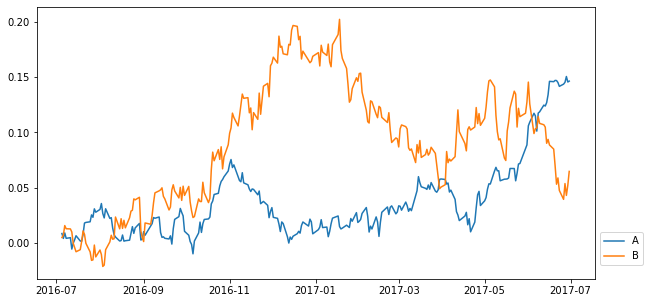

Most volatile stock: B


In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

def get_most_volatile(prices):
    """Return the ticker symbol for the most volatile stock.
    
    Parameters
    ----------
    prices : pandas.DataFrame
        a pandas.DataFrame object with columns: ['ticker', 'date', 'price']
    
    Returns
    -------
    ticker : string
        ticker symbol for the most volatile stock
    """
    # TODO: Fill in this function.
#     print(prices)
#     return
    pivot_df = prices.pivot(index="date", columns=["ticker"], values=["price"])
    pivot_df = np.log1p(pivot_df.pct_change())
    vol = pivot_df.std()
    display(vol.reset_index())
    plt.figure(figsize=(10, 5))
    plt.plot(pivot_df[("price", "A")].cumsum(), label="A")
    plt.plot(pivot_df[("price", "B")].cumsum(), label="B")
    plt.legend(loc=(1.01, .05))
    plt.show()
    return vol.sort_values().idxmax()[1]


def test_run(filename='prices.csv'):
    """Test run get_most_volatile() with stock prices from a file."""
    prices = pd.read_csv(filename, parse_dates=['date'])
    print("Most volatile stock: {}".format(get_most_volatile(prices)))


if __name__ == '__main__':
    test_run()